# Week 4: machine learning

Since I might finish school within the next year, I might soon be entering the job market. Nowadays there are algorithms in play that preselect candidates. I think it is interesting to know more about this. And see if we can use a prediction model to predict Attrition. I will be using the following attributes to predict this dependent: 

1. Age
2. BusinessTravel
3. DailyRate
4. Education
5. TotalWorkingYears
6. YearsInCurrentRole
7. DistanceFromHome
8. Department

In [1]:
import seaborn as sns
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('employee_attrition.csv') 
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# I remove NA items to be sure
df = df.dropna()
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


I use visualisations to see if there are impossible values

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


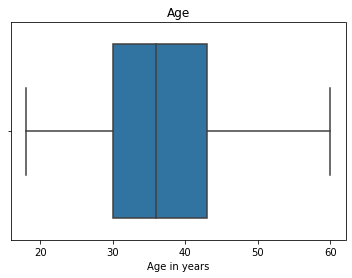

In [4]:
sns.boxplot(df['Age'])
plt.title('Age')
plt.xlabel('Age in years')
plt.show()

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


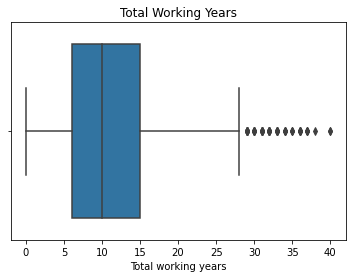

In [5]:
sns.boxplot(df['TotalWorkingYears'])
plt.title('Total Working Years')
plt.xlabel('Total working years')
plt.show()

C:\Users\monzi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


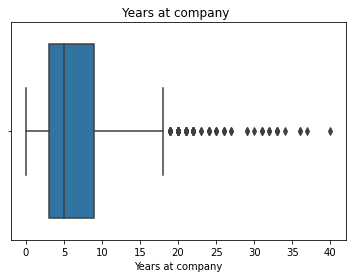

In [6]:
sns.boxplot(df['YearsAtCompany'])
plt.title('Years at company ')
plt.xlabel('Years at company')
plt.show()

There seem to be no impossible values, but I will still be selecting only relevant data. 

In [7]:
df2 = df[['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Education','TotalWorkingYears', 'YearsInCurrentRole', 'DistanceFromHome', 'Department']]
df2.head()

,Attrition,Age,BusinessTravel,DailyRate,Education,TotalWorkingYears,YearsInCurrentRole,DistanceFromHome,Department
0,Yes,41,Travel_Rarely,1102,2,8,4,1,Sales
1,No,49,Travel_Frequently,279,1,10,7,8,Research & Development
2,Yes,37,Travel_Rarely,1373,2,7,0,2,Research & Development
3,No,33,Travel_Frequently,1392,4,8,7,3,Research & Development
4,No,27,Travel_Rarely,591,1,6,2,2,Research & Development


I will make dummies for the categories

In [8]:
df2['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [9]:
dummies2 = pd.get_dummies(df2['Attrition'])
df2= pd.concat([df2, dummies2],axis =1)
df2.head()
#create dummie for Attrition

,Attrition,Age,BusinessTravel,DailyRate,Education,TotalWorkingYears,YearsInCurrentRole,DistanceFromHome,Department,No,Yes
0,Yes,41,Travel_Rarely,1102,2,8,4,1,Sales,0,1
1,No,49,Travel_Frequently,279,1,10,7,8,Research & Development,1,0
2,Yes,37,Travel_Rarely,1373,2,7,0,2,Research & Development,0,1
3,No,33,Travel_Frequently,1392,4,8,7,3,Research & Development,1,0
4,No,27,Travel_Rarely,591,1,6,2,2,Research & Development,1,0


In [10]:
dummies2 = pd.get_dummies(df2['BusinessTravel'])
df2= pd.concat([df2, dummies2],axis =1)
df2.head()
#create dummie for Business travel

,Attrition,Age,BusinessTravel,DailyRate,Education,TotalWorkingYears,YearsInCurrentRole,DistanceFromHome,Department,No,Yes,Non-Travel,Travel_Frequently,Travel_Rarely
0,Yes,41,Travel_Rarely,1102,2,8,4,1,Sales,0,1,0,0,1
1,No,49,Travel_Frequently,279,1,10,7,8,Research & Development,1,0,0,1,0
2,Yes,37,Travel_Rarely,1373,2,7,0,2,Research & Development,0,1,0,0,1
3,No,33,Travel_Frequently,1392,4,8,7,3,Research & Development,1,0,0,1,0
4,No,27,Travel_Rarely,591,1,6,2,2,Research & Development,1,0,0,0,1


In [11]:
dummies2 = pd.get_dummies(df2['Department'])
df2= pd.concat([df2, dummies2],axis =1)
df2.head()
#create dummie for department

,Attrition,Age,BusinessTravel,DailyRate,Education,TotalWorkingYears,YearsInCurrentRole,DistanceFromHome,Department,No,Yes,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,Yes,41,Travel_Rarely,1102,2,8,4,1,Sales,0,1,0,0,1,0,0,1
1,No,49,Travel_Frequently,279,1,10,7,8,Research & Development,1,0,0,1,0,0,1,0
2,Yes,37,Travel_Rarely,1373,2,7,0,2,Research & Development,0,1,0,0,1,0,1,0
3,No,33,Travel_Frequently,1392,4,8,7,3,Research & Development,1,0,0,1,0,0,1,0
4,No,27,Travel_Rarely,591,1,6,2,2,Research & Development,1,0,0,0,1,0,1,0


In [12]:
for col in df2.columns:
    print(col)


Attrition
Age
BusinessTravel
DailyRate
Education
TotalWorkingYears
YearsInCurrentRole
DistanceFromHome
Department
No
Yes
Non-Travel
Travel_Frequently
Travel_Rarely
Human Resources
Research & Development
Sales


In [13]:
from sklearn.preprocessing import normalize

X = df2[['Age','DailyRate', 'Education', 'TotalWorkingYears', 'YearsInCurrentRole', 'DistanceFromHome', 'Yes', 'Non-Travel', 'Travel_Frequently', 'Travel_Rarely', 'Human Resources', 'Research & Development', 'Sales']] 
X = normalize(X) 
y = df2['Attrition'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200, random_state=1) 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train) 
knn.score(X_test, y_test) 

0.805

>> This means we can correctly predict nearly 80,5%

In [15]:
from sklearn.metrics import confusion_matrix

y_test_pred = knn.predict(X_test) 
cm = confusion_matrix(y_test, y_test_pred) 
cm

array([[155,   5],
       [ 34,   6]], dtype=int64)

In [16]:
conf_matrix = pd.DataFrame(cm, index=['False_actual','True_actual'], columns = ['False_predicted','True_predicted']) 
conf_matrix

,False_predicted,True_predicted
False_actual,155,5
True_actual,34,6


We can conclude the following:
>> 155 are correctly predicted as 'false'& 5 are instead predicted as 'true'. 

The recall the category false_actual is:
Recall = 155 / 155 + 5 = 0,97

The Precision the category false_actual is:
Precision = 155 / 155 + 34 = 0,82
